# SwissRe Accident Risk Prediction

## Data Visualization And Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Reading Accident Dataset

In [2]:
accident_df = pd.read_csv('./resources/datasets/accident_lat_long_data.csv')
accident_df.shape

(198213, 44)

### Summary Statistics

In [3]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198213 entries, 0 to 198212
Data columns (total 44 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               198213 non-null  object 
 1   Location_Easting_OSGR                        198213 non-null  int64  
 2   Location_Northing_OSGR                       198213 non-null  int64  
 3   Longitude                                    198213 non-null  float64
 4   Latitude                                     198213 non-null  float64
 5   Police_Force                                 198213 non-null  int64  
 6   Accident_Severity                            198213 non-null  int64  
 7   Number_of_Vehicles                           198213 non-null  int64  
 8   Number_of_Casualties                         198213 non-null  int64  
 9   Date                                         198213 non-nul

In [4]:
accident_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'building', 'house_number', 'road',
       'neighbourhood', 'suburb', 'city_district', 'city', 'state_district',
       'state', 'postcode', 'country'],
      dtype='object')

##### Sample Data

In [5]:
accident_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,house_number,road,neighbourhood,suburb,city_district,city,state_district,state,postcode,country
0,201201BS70013,524720,179100,-0.204686,51.497037,1,3,2,2,01/01/12,...,NaN,Kensington High Street,NaN,Earl's Court,Royal Borough of Kensington and Chelsea,London,Greater London,England,W14 8NS,United Kingdom
1,201201CP00019,532410,180770,-0.093342,51.510297,48,3,4,2,01/01/12,...,NaN,Upper Thames Street,NaN,NaN,NaN,City of London,Greater London,England,EC3,United Kingdom
2,201201CW10046,526230,182630,-0.181682,51.528427,1,3,2,1,01/01/12,...,NaN,Lanark Road,NaN,Maida Vale,NaN,City of Westminster,Greater London,England,W9 1RX,United Kingdom
3,201201HT20011,537990,181020,-0.012885,51.511210,1,3,2,1,01/01/12,...,187,East India Dock Road,NaN,Poplar,NaN,London,Greater London,England,E14 0EF,United Kingdom
4,201201JI40027,541590,188690,0.042041,51.579241,1,3,2,1,01/01/12,...,NaN,North Circular Road,NaN,Redbridge,London Borough of Redbridge,London,Greater London,England,IG4 5PA,United Kingdom


In [6]:
accident_df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,198213.000000,1.982130e+05,198213.000000,198213.000000,198213.000000,198213.000000,198213.000000,198213.000000,198213.000000,198213.000000,198213.000000,198213.000000,198213.000000,0.0,198213.000000,198213.000000,198213.000000,198213.000000
mean,447358.747746,3.039765e+05,-1.322839,52.623961,23.971147,2.838991,1.819129,1.332905,4.114039,281.276415,4.052686,994.995964,37.477158,NaN,2.850424,375.811556,1.304057,2012.265618
std,90320.934642,1.557132e+05,1.325792,1.403169,24.689923,0.395418,0.695055,0.796306,1.917912,254.513622,1.402300,1808.204818,13.327948,NaN,3.158955,1272.720930,0.460008,0.441663
min,65510.000000,1.040400e+04,-7.509162,49.914145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2012.000000
25%,383803.000000,1.795400e+05,-2.244477,51.501269,4.000000,3.000000,1.000000,1.000000,2.000000,65.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2012.000000
50%,447610.000000,2.719400e+05,-1.296776,52.333802,13.000000,3.000000,2.000000,1.000000,4.000000,206.000000,3.000000,133.000000,30.000000,NaN,4.000000,0.000000,1.000000,2012.000000
75%,527237.000000,4.080330e+05,-0.165682,53.563016,43.000000,3.000000,2.000000,1.000000,6.000000,472.000000,6.000000,689.000000,40.000000,NaN,6.000000,0.000000,2.000000,2013.000000
max,655370.000000,1.189010e+06,1.759382,60.583032,98.000000,3.000000,18.000000,42.000000,7.000000,941.000000,6.000000,9840.000000,70.000000,NaN,6.000000,9999.000000,2.000000,2013.000000


### Missing Values Analysis

In [7]:
accident_df.isna().sum().sort_values(ascending = False)

Junction_Detail                                198213
building                                       188753
neighbourhood                                  179141
house_number                                   168490
city_district                                  161388
Junction_Control                                73259
city                                            67019
suburb                                          44105
state_district                                  15629
LSOA_of_Accident_Location                       10228
road                                             6786
postcode                                         2451
Road_Surface_Conditions                           290
Time                                                5
Special_Conditions_at_Site                          1
Did_Police_Officer_Attend_Scene_of_Accident         1
Carriageway_Hazards                                 0
Accident_Index                                      0
Urban_or_Rural_Area         

In [8]:
missing_percentage = accident_df.isna().sum().sort_values(ascending = False)/len(accident_df)
#display(missing_percentage)
#sort out the ones with zeroes
missing_percentage[missing_percentage != 0]

Junction_Detail                                1.000000
building                                       0.952274
neighbourhood                                  0.903780
house_number                                   0.850045
city_district                                  0.814215
Junction_Control                               0.369597
city                                           0.338116
suburb                                         0.222513
state_district                                 0.078850
LSOA_of_Accident_Location                      0.051601
road                                           0.034236
postcode                                       0.012365
Road_Surface_Conditions                        0.001463
Time                                           0.000025
Special_Conditions_at_Site                     0.000005
Did_Police_Officer_Attend_Scene_of_Accident    0.000005
dtype: float64

##### What is the percentage share of missing values for each column in the entire data?

<Axes: >

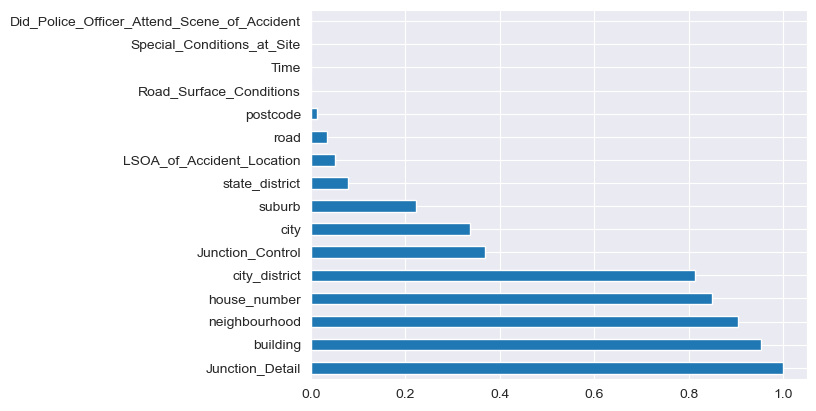

In [9]:
missing_percentage[missing_percentage != 0].plot(kind = 'barh')

### Accidents by State

In [10]:
states_by_accident = accident_df.state.value_counts()
states_by_accident[:10]

England            182558
Alba / Scotland      9674
Cymru / Wales        5981
Name: state, dtype: int64

<Axes: >

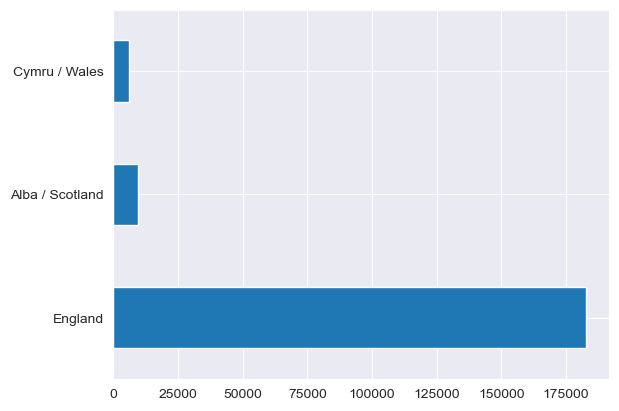

In [11]:
states_by_accident[:10].plot(kind = 'barh')

#### Visualization: map of accidents by state

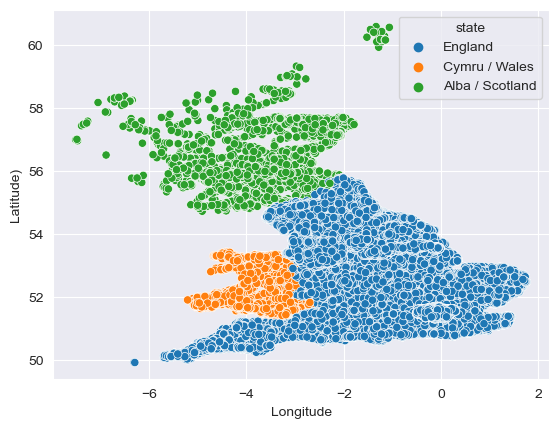

In [12]:
# Visualization: map of accidents by state
sns.scatterplot(x='Longitude', y='Latitude', data=accident_df, hue='state')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

### Accidents by City

London                 43605
Leeds                   3685
City of Westminster     2942
Bradford                2412
Liverpool               2402
                       ...  
St Asaph                  23
Wells                     15
Ripon                      7
Stoke-on-Trent             4
St Davids                  2
Name: city, Length: 196, dtype: int64

<Axes: >

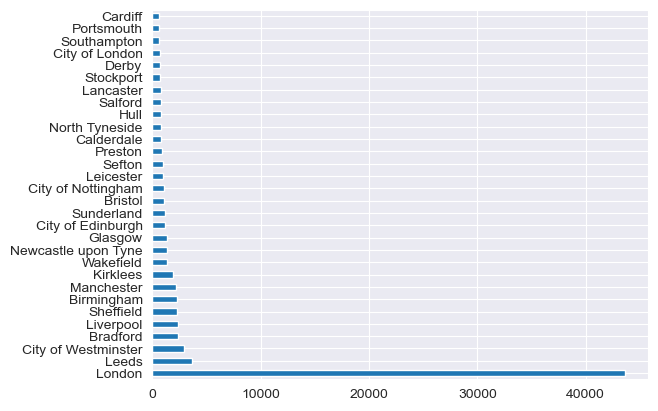

In [13]:
accident_df.city.unique()
cities_by_accident = accident_df.city.value_counts()
display(cities_by_accident)
cities_by_accident[:30].plot(kind = 'barh')

#### Accident By Cities : distribution of cities by the number of accidents

<Axes: xlabel='city', ylabel='Count'>

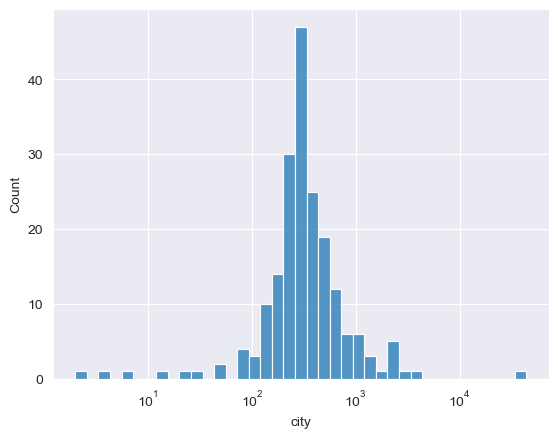

In [14]:
#plotting a hitogram with a logarithmic scale
sns.histplot(cities_by_accident, log_scale=True)

#### High accident cities where the number of accidents is greater and equal to 1000

London                 43605
Leeds                   3685
City of Westminster     2942
Bradford                2412
Liverpool               2402
Sheffield               2320
Birmingham              2231
Manchester              2144
Kirklees                1879
Wakefield               1379
Newcastle upon Tyne     1370
Glasgow                 1311
City of Edinburgh       1150
Sunderland              1147
Bristol                 1098
City of Nottingham      1043
Name: city, dtype: int64

<Axes: xlabel='city', ylabel='Count'>

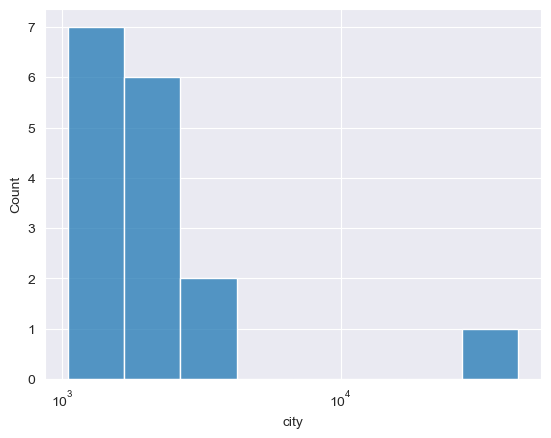

In [15]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
display(high_accident_cities)

sns.histplot(high_accident_cities, log_scale = True) 

#### Low accident cities where the number is less than 1000

In [16]:
low_accident_cities = cities_by_accident[cities_by_accident < 1000]
low_accident_cities

Leicester         995
Sefton            942
Preston           911
Calderdale        834
North Tyneside    809
                 ... 
St Asaph           23
Wells              15
Ripon               7
Stoke-on-Trent      4
St Davids           2
Name: city, Length: 180, dtype: int64

In [17]:
# percentage of the total number of cities have an accident number greater than 1000.
cities = accident_df.city.unique()
cities
len(high_accident_cities)/len(cities)

0.08121827411167512

##### Insight - 8.12 % of the total number of cities have an accident number greater than 1000

### Accidents By Time - What time of day witnesses more accidents

#### convert to timestamp type and override the original column


In [18]:
%timeit accident_df['accident_time'] = pd.to_datetime(accident_df['Date'] + accident_df['Time'], format='%d/%m/%y%H:%M')
#display(accident_df.accident_time)

538 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<Axes: xlabel='accident_time'>

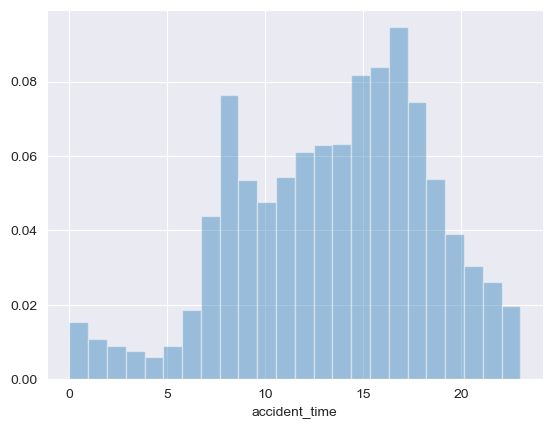

In [19]:
sns.distplot(accident_df.accident_time.dt.hour, bins = 24, kde=False, norm_hist=True)

#### Insight - 
There are two peaks of time- one in the morning in between 6 am to 9 am and another between 3 pm and 6 pm. This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents.

### WeekDay vs Weekend Accident Comparison
Does this trend apply on weekends too? Let us do a Monday and Sunday comparison.

<Axes: xlabel='accident_time'>

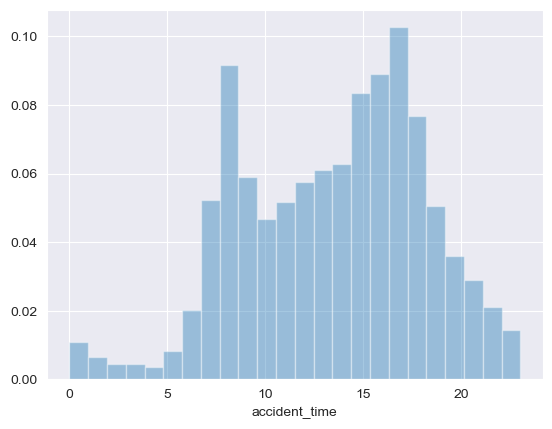

In [20]:
#pull the day of the week from the timestamp format
monday_start_time = accident_df.accident_time[accident_df.accident_time.dt.dayofweek == 0]
#plot the distribution
sns.distplot(monday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)

<Axes: xlabel='accident_time'>

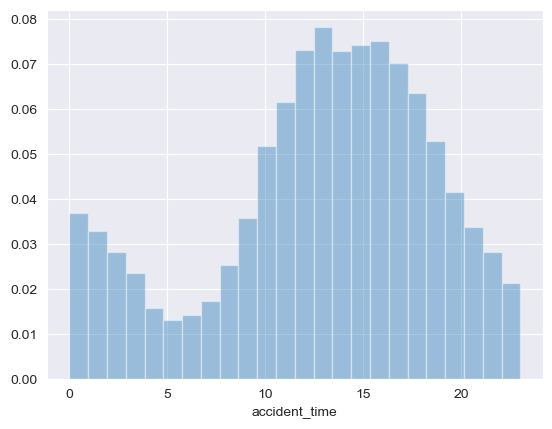

In [21]:
#pull the day of the week from the timestamp format
sunday_start_time = accident_df.accident_time[accident_df.accident_time.dt.dayofweek == 6]
#plot the distribution
sns.distplot(sunday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)

#### Insight - 
While Monday follows the general 24-hour pattern- two peaks coinciding with work rush; the distribution for Sunday sees a peak between 10 am and 2 pm. This could be due to people going out for leisurely activities on Sundays.

### Monthly Distribution of Accidents

<Axes: xlabel='accident_time'>

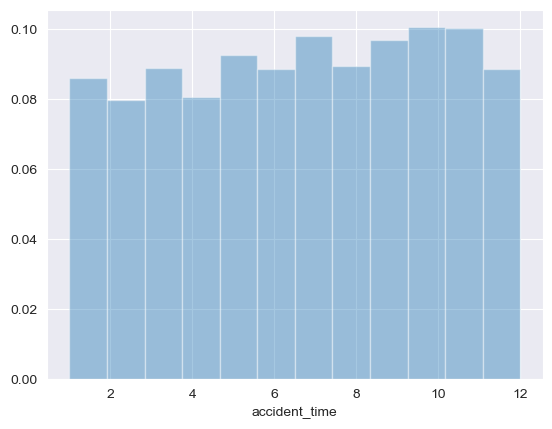

In [22]:
#plot for months
sns.distplot(accident_df.accident_time.dt.month, bins = 12, kde=False, norm_hist=True)

#### Insight - 
If we plot for the monthly distribution of accidents, there seems to be a steady upward curve from the second half of the year, as shown above - This could possibly be due to summer break and then the new school term around August-September.

#### Monthly Distribution of Accidents for 2013 Data
But does this hold for all the years under consideration? Let’s look at 2013-

2012.0    145559
2013.0     52649
Name: accident_time, dtype: int64

<Axes: xlabel='accident_time'>

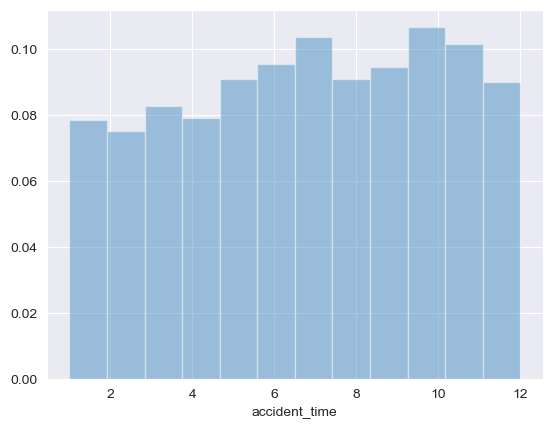

In [23]:
display(accident_df.accident_time.dt.year.value_counts())
#2013
df_2013 = accident_df[accident_df.accident_time.dt.year == 2013]
sns.distplot(df_2013.accident_time.dt.month, bins = 12, kde=False, norm_hist=True)

#### Insight - 
There seems to be a steady upward curve from the second half of the year, as shown above. This could possibly be due to summer break and then the new school term around August-September.

### Weather Conditions When Accidents Occurred

In [24]:
accident_df.Weather_Conditions.value_counts()

Fine without high winds       158729
Raining without high winds     25167
Unknown                         3580
Other                           3520
Raining with high winds         2838
Fine with high winds            1900
Snowing without high winds      1178
Fog or mist                     1031
Snowing with high winds          270
Name: Weather_Conditions, dtype: int64

Fine without high winds       158729
Raining without high winds     25167
Unknown                         3580
Other                           3520
Raining with high winds         2838
Fine with high winds            1900
Snowing without high winds      1178
Fog or mist                     1031
Snowing with high winds          270
Name: Weather_Conditions, dtype: int64

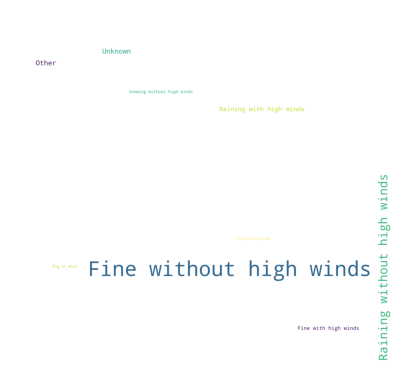

In [25]:
display(accident_df['Weather_Conditions'].value_counts())
data = accident_df['Weather_Conditions'].value_counts().to_dict()
wc = WordCloud(width = 1900, height = 1800,
background_color ='white',
min_font_size = 12).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Insight 
Most frequent used word is "Fine without high winds" meaning that most accidents occurred when weather was "Fine without high winds"

### Light Conditions When Accidents Occurred

Daylight: Street light present               144302
Darkness: Street lights present and lit       40437
Darkeness: No street lighting                  8791
Darkness: Street lighting unknown              3698
Darkness: Street lights present but unlit       985
Name: Light_Conditions, dtype: int64

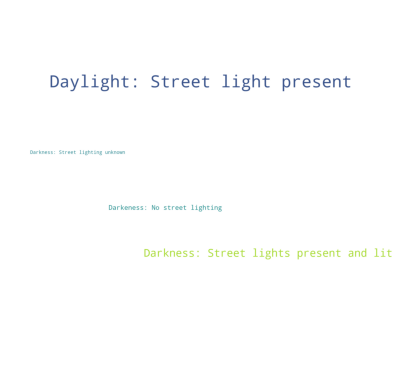

In [26]:
display(accident_df['Light_Conditions'].value_counts())
data = accident_df['Light_Conditions'].value_counts().to_dict()
wc = WordCloud(width = 1900, height = 1800,
background_color ='white',
min_font_size = 20).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Insight 
Most frequent used word is "Daylight: Street light present" meaning that most accidents occurred when lighting conditions were <b>"Daylight: Street light present"<b>

### Special Conditions At Site When Accidents Occurred

In [27]:
accident_df['Special_Conditions_at_Site'].value_counts()

None                                               193903
Roadworks                                            1934
Ol or diesel                                          612
Mud                                                   600
Road surface defective                                431
Auto traffic singal out                               352
Permanent sign or marking defective or obscured       268
Auto traffic signal partly defective                  112
Name: Special_Conditions_at_Site, dtype: int64

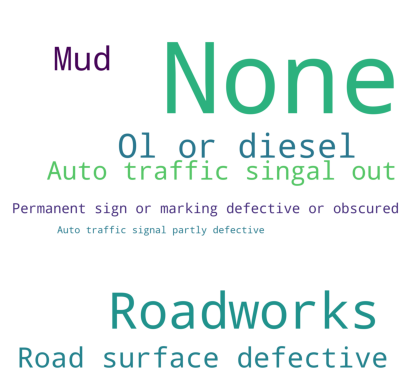

In [28]:
data = accident_df['Special_Conditions_at_Site'].value_counts().to_dict()
wc = WordCloud(width = 1900, height = 1800,
background_color ='white',
min_font_size = 15).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Insight 
Most frequent used word is "None" meaning that most accidents occurred when special conditions at site were <b>"None"</b>

## Data Preprocessing - Aggregation at PostCode Level

#### The accident data needs aggregated by the postcode and year to generate the training dataset
     The mean casualties for a given postcode is our dependent or target variable

In [29]:
accident_df_aggregated = accident_df.groupby(['postcode','Year']).aggregate(
    {'Number_of_Casualties':['sum','mean'],
     'Number_of_Vehicles':['sum','mean'],
     'Police_Force':['sum','mean']})

In [30]:
accident_df_aggregated[0:100]

Number_of_Casualties      Number_of_Vehicles      Police_Force  \
                               sum mean                sum mean          sum   
postcode Year                                                                  
AB10 1AU 2012                    1  1.0                  1  1.0           92   
AB10 1BD 2012                    1  1.0                  1  1.0           92   
AB10 1BW 2012                    1  1.0                  1  1.0           92   
AB10 1HT 2012                    3  1.5                  3  1.5          184   
AB10 1NJ 2012                    2  1.0                  4  2.0          184   
...                            ...  ...                ...  ...          ...   
AB12 4LH 2012                    1  1.0                  2  2.0           92   
AB12 4LQ 2012                    1  1.0                  3  3.0           92   
AB12 4QH 2012                    1  1.0                  2  2.0           92   
AB12 4QL 2012                    1  1.0                  1  1.0           92   
AB12 4QN 2012                    1  1.0                  1  1.0           92   

                     
               mean  
postcode Year        
AB10 1AU 2012  92.0  
AB10 1BD 2012  92.0  
AB10 1BW 2012  92.0  
AB10 1HT 2012  92.0  
AB10 1NJ 2012  92.0  
...             ...  
AB12 4LH 2012  92.0  
AB12 4LQ 2012  92.0  
AB12 4QH 2012  92.0  
AB12 4QL 2012  92.0  
AB12 4QN 2012  92.0  

[100 rows x 6 columns]

The mean casualties for a given postcode ( as shown in table above ) is our dependent variable or target variable

In [31]:
accident_df_aggregated.to_csv('resources/output/aggregated_accident_lat_long_data.csv',index=True)